In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm #allows us easy access to colormaps
import seaborn as sns

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
listings_summary = pd.read_csv('data/melbourne/listings_summary_dec18.csv')
listings_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,nan,Manningham,-37.77,145.09,Private room,60,1,4,2015-09-12,0.04,1,365
1,10803,Room in Cool Deco Apartment in Brunswick,38901,Lindsay,nan,Moreland,-37.77,144.98,Private room,35,3,108,2018-11-26,1.50,1,213
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,50121,Frank & Vince,nan,Port Phillip,-37.86,144.98,Entire home/apt,159,3,15,2018-11-07,0.15,17,326
3,15246,Large private room-close to city,59786,Eleni,nan,Darebin,-37.76,144.99,Private room,50,2,29,2017-05-15,0.30,3,0
4,16760,Melbourne BnB near City & Sports,65090,Colin,nan,Port Phillip,-37.86,144.99,Private room,69,1,63,2018-11-22,0.74,1,328


In [3]:
listings = pd.read_csv('data/melbourne/listings_dec18.csv')
listings.head()

/Users/unchitta/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20181207034809,2018-12-07,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",none,Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,nan,nan,https://a0.muscache.com/im/pictures/44620/5a58...,nan,33057,https://www.airbnb.com/users/show/33057,Manju,2009-08-21,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,nan,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1.00,1.00,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,nan,Bulleen,VIC,3105,Melbourne,"Bulleen, Australia",AU,Australia,-37.77,145.09,f,House,Private room,2,1.00,1.00,2.00,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",nan,$60.00,NaN,NaN,NaN,NaN,1,$22.00,1,365,17 months ago,t,30,60,90,365,2018-12-07,4,2011-05-24,2015-09-12,90.00,9.00,10.00,10.00,10.00,9.00,9.00,f,NaN,nan,f,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,20181207034809,2018-12-07,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,none,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,nan,nan,https://a0.muscache.com/im/pictures/31323790/9...,nan,38901,https://www.airbnb.com/users/show/38901,Lindsay,2009-09-16,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,nan,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,nan,Brunswick East,VIC,3057,Melbourne,"Brunswick East, Australia",AU,Australia,-37.77,144.98,t,Apartment,Private room,2,1.00,1.00,1.00,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",226.00,$35.00,$200.00,$803.00,$0.00,$9.00,1,$15.00,3,45,6 weeks ago,t,4,9,33,213,2018-12-07,108,2013-01-12,2018-11-26,87.00,9.00,8.00,9.00,9.00,9.00,9.00,f,NaN,nan,t,f,moderate,t

### How many listings does each neighbourhood have? And average price for each?

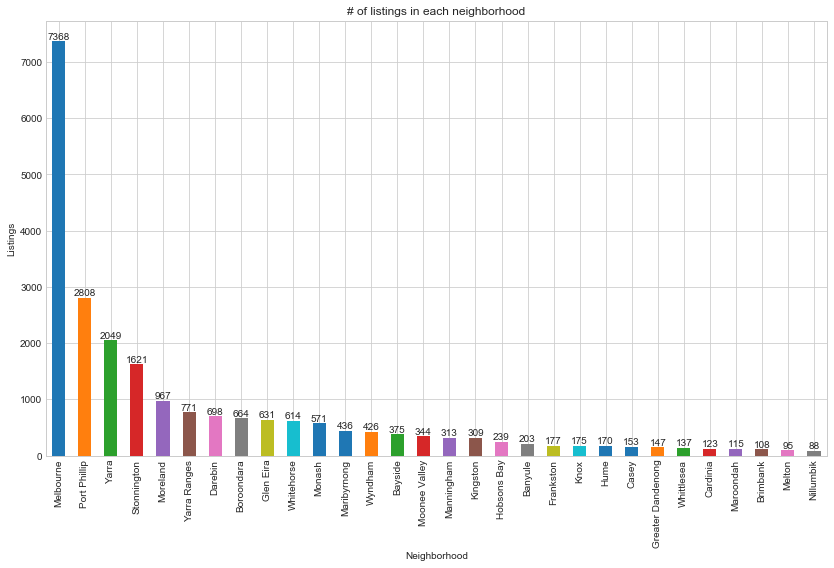

In [12]:
sns.set_style("whitegrid")

ax = listings_summary['neighbourhood'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="# of listings in each neighborhood")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Listings")

# add number labels to top of bars
labels = listings_summary['neighbourhood'].value_counts().tolist()
bars = ax.patches
for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()

In [17]:
nbh_grouped = listings_summary.groupby('neighbourhood')
nbh_grouped['price'].mean().sort_values(ascending=False)

neighbourhood
Yarra Ranges        245.97
Bayside             225.42
Casey               215.84
Cardinia            167.12
Stonnington         165.94
Port Phillip        163.22
Frankston           158.63
Boroondara          157.07
Melbourne           154.13
Manningham          154.11
Nillumbik           147.50
Yarra               144.67
Hobsons Bay         137.87
Kingston            135.69
Darebin             126.46
Glen Eira           118.54
Moonee Valley       109.85
Banyule             109.45
Maribyrnong         108.71
Hume                108.55
Knox                106.50
Wyndham             105.95
Moreland            105.65
Monash              105.29
Melton              103.12
Maroondah           101.90
Whitehorse           99.70
Greater Dandenong    99.68
Whittlesea           87.71
Brimbank             79.09
Name: price, dtype: float64

### There's no correlation between # of listings and average price

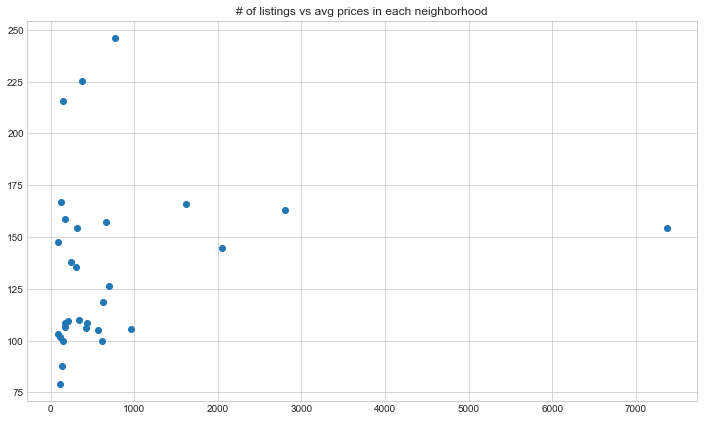

In [29]:
# Is there a correlation between number of listings and average price?
# Plot a scatter plot of number of listings and avg prices

frame = listings_summary['neighbourhood'].value_counts().to_frame()
frame.columns = ['count']
frame['avg price'] = nbh_grouped['price'].mean()

plt.figure(figsize=(12,7))
plt.scatter(frame['count'],frame['avg price'])
plt.title('# of listings vs avg prices in each neighborhood')
plt.show()

In [30]:
listings_summary['price'].mean()

148.00436776588774

In [ ]:
## average price for each type of room for each neighborhood
## of listings for each type of room for each neighborhood


In [53]:
nbh_room_grouped = listings_summary.groupby(['neighbourhood','room_type'])
groups = set([name for name, _ in nbh_room_grouped.groups.keys()])
nbh_room_grouped_cnt = nbh_room_grouped['id'].count()
nbh_room_grouped_pct = nbh_room_grouped_cnt.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

nbh_room_grouped_pct
#frame2 = nbh_room_grouped['id'].count().to_frame()
#frame2.columns = ['count']
#frame2['pct'] = 

neighbourhood      room_type      
Banyule            Entire home/apt   51.72
                   Private room      45.81
                   Shared room        2.46
Bayside            Entire home/apt   69.33
                   Private room      28.80
                   Shared room        1.87
Boroondara         Entire home/apt   51.05
                   Private room      47.14
                   Shared room        1.81
Brimbank           Entire home/apt   26.85
                   Private room      73.15
Cardinia           Entire home/apt   60.16
                   Private room      39.02
                   Shared room        0.81
Casey              Entire home/apt   34.64
                   Private room      64.71
                   Shared room        0.65
Darebin            Entire home/apt   54.30
                   Private room      44.99
                   Shared room        0.72
Frankston          Entire home/apt   58.19
                   Private room      41.24
                   

### Which neighborhood is the busiest and what time of year is it busiest? Do prices spike?

### Correlation matrix of price and features?

### Characteristics of hosts in each neighborhood